In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problème de la chainette #

## Données du problème ##

In [2]:
L = 3
L1 = 3
L2 = 4
lmin = sqrt(L ** 2 + (L2 - L1) ** 2)
l = lmin + 1
g = 10
rho = 5
N = 1000

##  Résolution par méthode du Tir ##

In [3]:
def f(u, beta):
    return array([u[1], beta * sqrt(1 + u[1] ** 2)])

In [4]:
def euler(yp0, N, y0, beta):
    h = L/N
    sol = zeros((2, N + 1))
    sol[0, 0] = y0
    sol[1, 0] = yp0
    for i in range(N):
        sol[:, i + 1] = sol[:, i]+ h * f(sol[:, i], beta)
    return sol

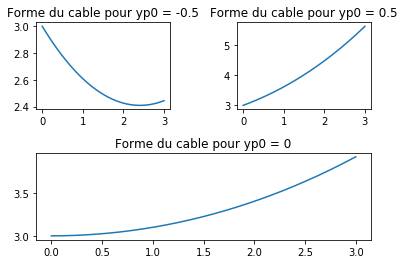

In [5]:
xx = linspace(0, L, N + 1)

yp0 = 0
y1 = euler(yp0, N, L1, 0.2)[0, :]

subplots_adjust(wspace=0.5, hspace=0.5)
ax1 = subplot(212)
ax1.plot(xx, y1)
ax1.set_title('Forme du cable pour yp0 = 0')

yp0 = 0.5
y2 = euler(yp0, N, L1, 0.2)[0, :]
ax2 = subplot(222)
ax2.plot(xx, y2)
ax2.set_title('Forme du cable pour yp0 = 0.5')

yp0 = -0.5
y3 = euler(yp0, N, L1, 0.2)[0, :]
ax3 = subplot(221)
ax3.plot(xx, y3)
ax3.set_title('Forme du cable pour yp0 = -0.5')

show()

In [6]:
def dichotomie(s1, s2, N, L1, beta, L2, tol = 10 ** (-6)):
    s3 = (s1 + s2) / 2
    y1 = euler(s1, N, L1, beta)[0, :]
    y2 = euler(s2, N, L1, beta)[0, :]
    y3 = euler(s3, N, L1, beta)[0, :]
    while abs(s2 - s1) > tol:
        if ((y1[-1] - L2) * (y3[-1] - L2) > 0):
            s1 = s3
            s3 = (s1 + s2) / 2
            y1 = y3
            y3 = euler(s3, N, L1, beta)[0, :]
        else:
            s2 = s3
            s3 = (s1 + s2) / 2
            y2 = y3
            y3 = euler(s3, N, L1, beta)[0, :]
    return s3

In [7]:
dichotomie(-0.5, 0.5, N, L1, 0.2, L2, tol = 10 ** (-6))

0.023074626922607422

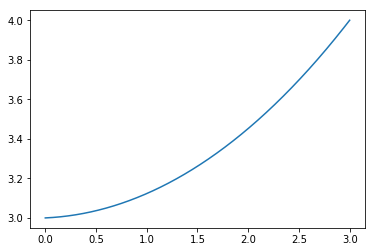

In [8]:
xx = linspace(0, L, N + 1)

yp0 = dichotomie(-0.5, 0.5, N, L1, 0.2, L2, tol = 10 ** (-6))
y1 = euler(yp0, N, L1, 0.2)[0, :]

plot(xx, y1)

## Contrôle avec la longueur du fil

In [9]:
def rectangle(yp, N, L):
    return L/N * sum(sqrt(1 + yp[0:N] ** 2))

In [10]:
beta = 1
yp0 = dichotomie(-0.5, 0.5, N, L1, beta, L2, tol = 10 ** (-6))
yp1 = euler(yp0, N, L1, beta)[1, :]
rectangle(yp1, N, L) - l

11.506813351083668

In [11]:
def dichotomiebeta(beta1, beta2, N, L, L1, s1, s2, L2, l, tol = 10 **(-6)):
    beta3 = (beta1 + beta2) / 2
    yp01 = dichotomie(s1, s2, N, L1, beta1, L2, tol = 10 ** (-6))
    yp02 = dichotomie(s1, s2, N, L1, beta2, L2, tol = 10 ** (-6))
    yp03 = dichotomie(s1, s2, N, L1, beta3, L2, tol = 10 ** (-6))
    yp1 = euler(yp01, N, L1, beta1)[1, :]
    yp2 = euler(yp02, N, L1, beta2)[1, :]
    yp3 = euler(yp03, N, L1, beta3)[1, :]
    d1 = rectangle(yp1, N, L) - l
    d2 = rectangle(yp2, N, L) - l
    d3 = rectangle(yp3, N, L) - l
    while abs(beta1 - beta2) > tol :
        if d3 * d1 > 0:
            beta1 = beta3
            yp01 = yp03
            yp1 = yp3
            d1 = d3
            beta3 = (beta1 + beta2) / 2
            yp03 = dichotomie(s1, s2, N, L1, beta3, L2, tol = 10 ** (-6))
            yp3 = euler(yp03, N, L1, beta3)[1, :]
            d3 = rectangle(yp3, N, L) - l
        else:
            beta2 = beta3
            yp02 = yp03
            yp2 = yp3
            d2 = d3
            beta3 = (beta1 + beta2) / 2
            yp03 = dichotomie(s1, s2, N, L1, beta3, L2, tol = 10 ** (-6))
            yp3 = euler(yp03, N, L1, beta3)[1, :]
            d3 = rectangle(yp3, N, L) - l
    return beta3

In [12]:
beta = dichotomiebeta(0.2, 1, N, L, L1, -1.5, 1.5, L2, l, tol = 10 **(-6))
s = dichotomie(-1.5, 1.5, N, L1, beta, L2, tol = 10 ** (-6))

4.7563024097030393e-07

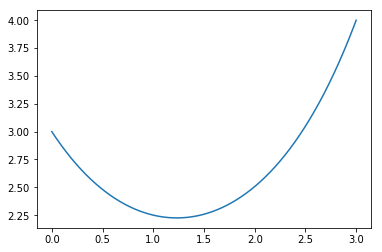

In [13]:
y1 = euler(s, N, L1, beta)
plot(xx, y1[0, :])
rectangle(y1[1, :], N, L) - l